In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 100

c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "flowers/"

gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2
)

# Load Data
train_ds = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes = os.listdir(root_path), #klasy nazwij tak, jak nazywają się foldery w folderze flowers
    shuffle=True,
    batch_size=32,
    target_size=(128,128),
    subset="training"
)

valid_ds = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes = os.listdir(root_path),
    shuffle=True,
    batch_size=32,
    target_size=(128,128),
    subset="validation"
)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [3]:
classes = os.listdir(root_path) #stwórz listę, w której będą nazwy klas. Stwórz ją na podstawie nazw folderów

In [4]:
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

(32, 128, 128, 3)


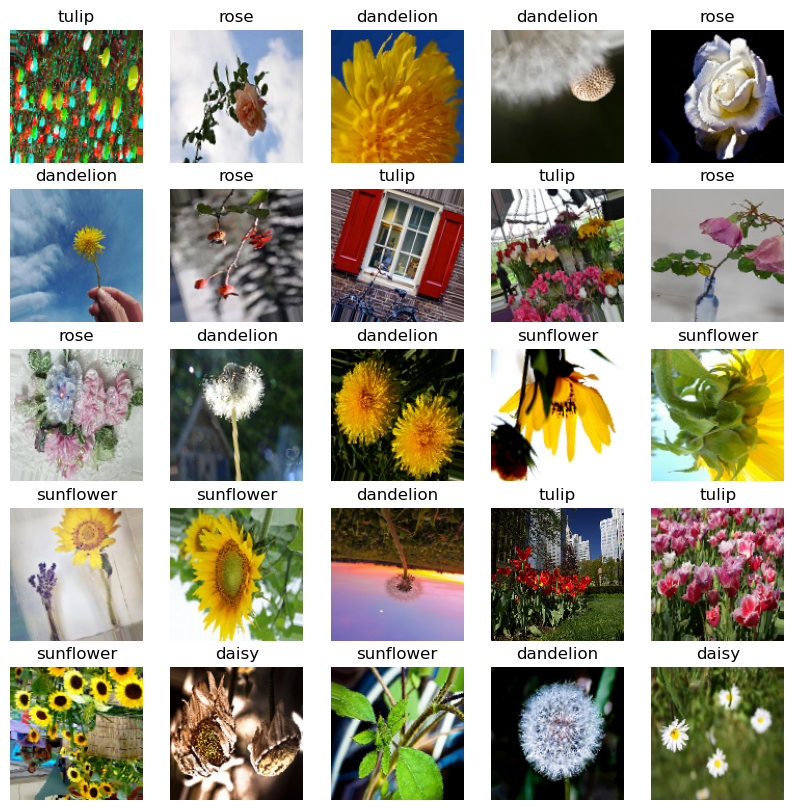

In [15]:
plt.figure(figsize=(10,10))
img, label = train_ds.next()
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title(classes[np.argmax(label[i,:])])
    
# ponieważ labele są w formacie [0,0,1,0,0], poleceniem argmax sprawdzamy, na którym miejscu
# jest jedynka. W powyższym przykładzie na pozycji 2. Oznacza to, że taki label wskazuje 
# na "rose".
# classes[np.argmax(label[i,:])] ->
# classes[np.argmax([0,0,1,0,0])] ->
# classes[2] -> "rose"

print(img.shape)    

In [ ]:
# Stwórz dwa modele.  
# Pierwszy bez augumentacji - dane należy wczytać na nowo.  Drugi z augumentacją i z 
# wykorzystaniem danych wczytanych u góry. Stwórz wykresy dla obu i porównaj.
# W pierwszym modelu dostosuj liczbę warstw maksymalizując accuracy. Następnie dla
# dokładnie takiego samego modelu powtórz te czynności, wykorzystując dane z augumentacją.

In [22]:
model = Sequential()
model.add(Conv2D(filters = 4, kernel_size = (3, 3), activation='relu', input_shape=(128,128, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters = 8, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 4)       112       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 8)         296       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 7200)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [23]:
history = model.fit(train_ds, epochs=EPOCHS, validation_data=valid_ds, callbacks=[es])

Epoch 1/100
109/109 [==============================] - 53s 468ms/step - loss: 1.3100 - accuracy: 0.4267 - val_loss: 1.1899 - val_accuracy: 0.5047
Epoch 2/100
109/109 [==============================] - 53s 486ms/step - loss: 1.1297 - accuracy: 0.5262 - val_loss: 1.1716 - val_accuracy: 0.5407
Epoch 3/100
109/109 [==============================] - 53s 490ms/step - loss: 1.0758 - accuracy: 0.5678 - val_loss: 1.1101 - val_accuracy: 0.5512
Epoch 4/100
109/109 [==============================] - 53s 481ms/step - loss: 1.0464 - accuracy: 0.5759 - val_loss: 1.0805 - val_accuracy: 0.5791
Epoch 5/100
109/109 [==============================] - 53s 483ms/step - loss: 1.0026 - accuracy: 0.5970 - val_loss: 1.0392 - val_accuracy: 0.5756
Epoch 6/100
109/109 [==============================] - 52s 480ms/step - loss: 0.9725 - accuracy: 0.6086 - val_loss: 1.0184 - val_accuracy: 0.5709
Epoch 7/100
109/109 [==============================] - 52s 478ms/step - loss: 0.9656 - accuracy: 0.6199 - val_loss: 1.0076 -

In [ ]:
img, label = valid_ds.next()
y_pred = model.predict(img)

1/1 [==============================] - 0s 215ms/step


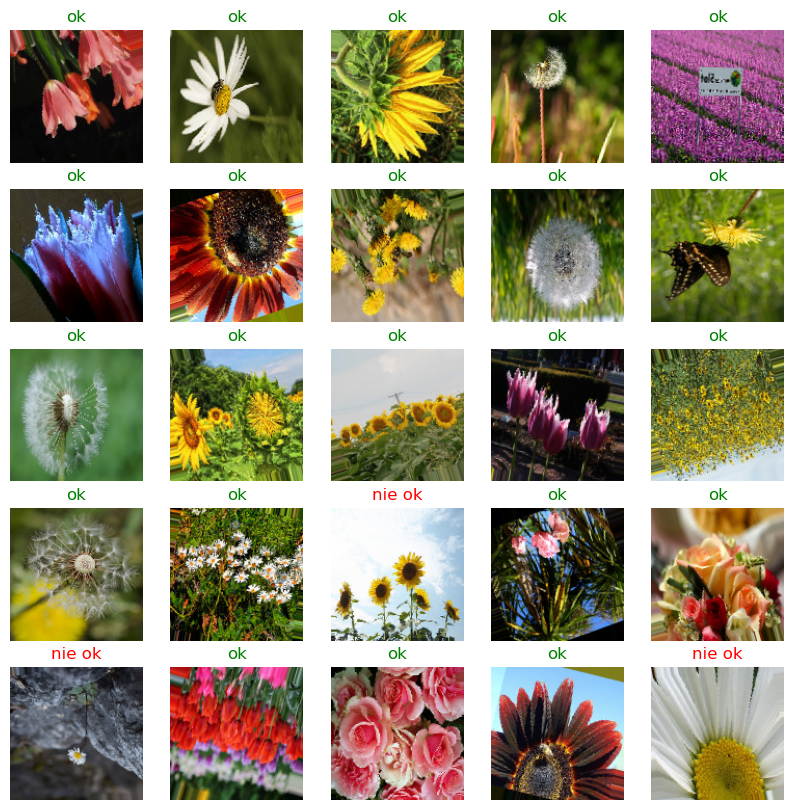

In [ ]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(img[i])
    plt.axis('off')
    if np.round(y_pred[i])[0] == label[i][0]:
        plt.title("ok", color = 'green')
    else:
        plt.title("nie ok", color = 'red')   

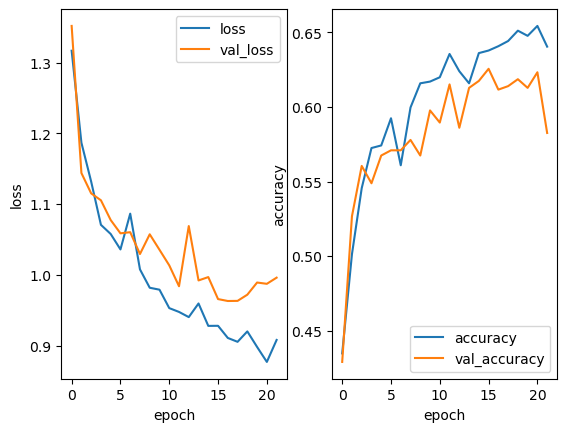

<Figure size 640x480 with 0 Axes>

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.subplot(1,2,1)
plt.plot(loss, label = "loss")
plt.plot(val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(acc, label = "accuracy")
plt.plot(val_acc, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.tight_layout()